In [2]:
import pandas as pd 
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [3]:
xls = pd.ExcelFile(r"C:\Users\Lenovo\Desktop\Data\Dataset\KPMG_VI_New_raw_data_update_final.xlsx")
df_t = pd.read_excel(xls, 'Transactions')
df_n = pd.read_excel(xls, 'NewCustomerList')
df_cd = pd.read_excel(xls, 'CustomerDemographic')
df_ca = pd.read_excel(xls, 'CustomerAddress')

C:\Windows\Temp\ipykernel_11624\3871693551.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_n = pd.read_excel(xls, 'NewCustomerList')
C:\Windows\Temp\ipykernel_11624\3871693551.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_cd = pd.read_excel(xls, 'CustomerDemographic')


In [4]:
df_t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [5]:
df_t['Profit'] = df_t['list_price'] - df_t['standard_cost']

Cleaning the Dataset

In [6]:
df_t.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
Profit                     197
dtype: int64

In [7]:
df_t.dropna(inplace=True)

In [8]:
df_n.isna().sum()


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [9]:
df_n.dropna(inplace=True)

In [10]:
df_cd.isna().sum()


customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
Age                                      1
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [11]:
df_cd.dropna(inplace=True)

In [12]:
df_ca.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [13]:
df_t.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87


In [14]:
df_t_cd = df_t.merge(df_cd,on='customer_id')

In [15]:
df_t_cd.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,Age,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,68.114734,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,68.114734,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,68.114734,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,44.032542,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,44.032542,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [16]:
df_t_cd.transaction_date

0       2017-02-25
1       2017-10-16
2       2017-04-26
3       2017-05-21
4       2017-10-05
           ...    
13635   2017-12-03
13636   2017-02-21
13637   2017-04-11
13638   2017-06-03
13639   2017-09-30
Name: transaction_date, Length: 13640, dtype: datetime64[ns]

EDA

In [17]:
df_t_cd.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'Age', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object')

Brand giving Maximum Profit

In [18]:
df_b_P = pd.DataFrame(df_t_cd.groupby('brand')['Profit'].sum().sort_values(ascending=False).reset_index())

In [19]:
df_b_P

,brand,Profit
0,WeareA2B,1859654.74
1,Solex,1674542.46
2,Trek Bicycles,1310494.64
3,Giant Bicycles,1072762.61
4,OHM Cycles,1016433.79
5,Norco Bicycles,598422.15


In [20]:
px.bar(df_b_P,x='brand',y='Profit')

Gender buying most itmes

In [21]:
df_g = pd.DataFrame(df_t_cd.groupby('gender')['customer_id'].count().reset_index())
df_g

,gender,customer_id
0,Female,6967
1,Male,6673


Text(0.5, 1.0, 'Number of Purchases done by Each Gender')

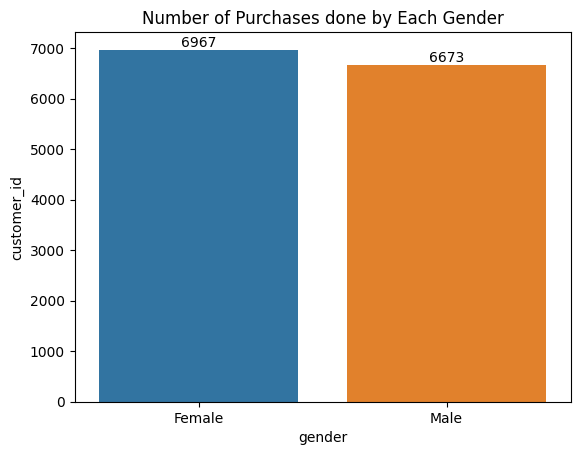

In [22]:
ax = sns.barplot(df_g,x='gender',y='customer_id')
ax.bar_label(ax.containers[0])
ax.set_title('Number of Purchases done by Each Gender')

In [23]:
df_g_buy = pd.DataFrame(df_t_cd.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index())
df_g_buy

,gender,past_3_years_bike_related_purchases
0,Female,339894
1,Male,335302


Text(0.5, 1.0, 'Gender baesd bike releated purchase')

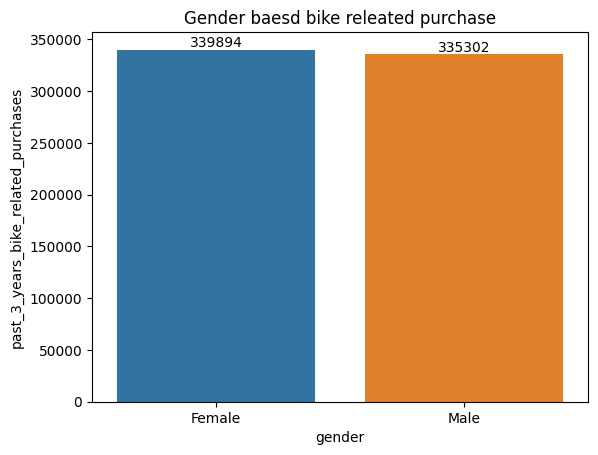

In [58]:
ax = sns.barplot(df_g_buy,x='gender',y='past_3_years_bike_related_purchases')
ax.bar_label(ax.containers[0])
ax.set_title('Gender baesd bike releated purchase')

RFM Analysis

In [97]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2017-12-30. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2017,12,31)

#Create RFM Modelling scores for each customer
RFMScores = df_t_cd.groupby('customer_id').agg({'transaction_date': lambda x: (Latest_Date - x.max()).days, 'product_id': lambda x: len(x), 'Profit': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['transaction_date'] = RFMScores['transaction_date'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'transaction_date': 'Recency', 
                         'product_id': 'Frequency', 
                         'Profit': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,customer_id,Recency,Frequency,Monetary
0,1,8,11,3018.09
1,2,129,3,2226.26
2,3,103,7,3290.21
3,9,79,6,2353.11
4,10,44,5,3358.28


C:\Windows\Temp\ipykernel_11624\977057765.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Recency', ylabel='Density'>

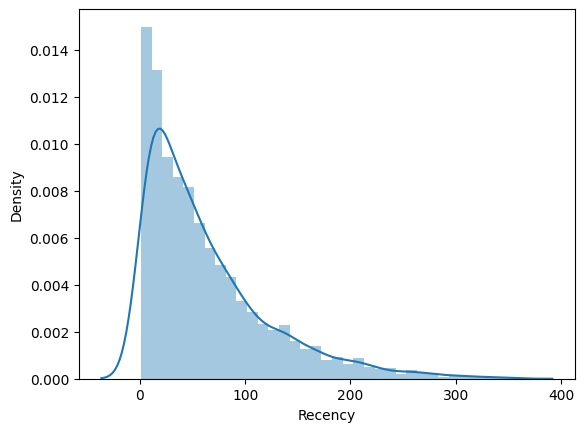

In [27]:
x=RFMScores['Recency']
sns.distplot(x)

C:\Windows\Temp\ipykernel_11624\4133125634.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Frequency', ylabel='Density'>

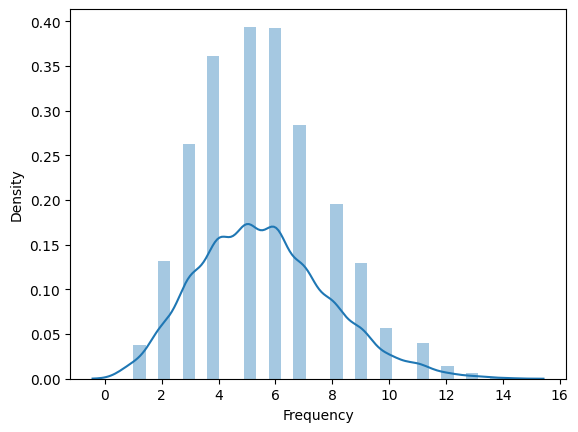

In [28]:
x=RFMScores['Frequency']
sns.distplot(x)

In [102]:
#Creating Quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [103]:
quantiles

{'Recency': {0.25: 19.0, 0.5: 45.0, 0.75: 88.0},
 'Frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'Monetary': {0.25: 1796.2174999999997,
  0.5: 2797.5250000000005,
  0.75: 4089.8325000000004}}

In [30]:
#Functions to create R, F and M segments 

#This function work same as the function as i used below but this function may not be understandable bby all people thats why i have simplified the  function for better Understanding.


#the lower the R value adn greater the FM value good will be the score

""" def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d): 
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 
        
        
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

"""

In [104]:
#This is a Simplified self explanatory function

def r_score(x):  #Here x is Recency value
    if x <= quantiles['Recency'][.25]:
        return 1
    elif x <= quantiles['Recency'][.50]:
        return 2
    elif x <= quantiles['Recency'][.75]:
        return 3
    else:
        return 4
    
def fm_score(x, c): #Here x is Freq and Monetary value  and c is telling whether we applying this on Freq or Monetary
    if x <= quantiles[c][.25]:
        return 4
    elif x <= quantiles[c][.50]:
        return 3
    elif x <= quantiles[c][.75]:
        return 2
    else:
        return 1  
      


In [105]:
print(quantiles['Recency'][0.25])

19.0


In [106]:
RFMScores['R'] = RFMScores['Recency'].apply(lambda x: r_score(x))
RFMScores['F'] = RFMScores['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFMScores['M'] = RFMScores['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))


In [107]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
customer_id,,,,,,,,
1,8,11,3018.09,1,1,2,112,4
2,129,3,2226.26,4,4,3,443,11
3,103,7,3290.21,4,2,2,422,8
9,79,6,2353.11,3,2,3,323,8
10,44,5,3358.28,2,3,2,232,7


In [108]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1,8,11,3018.09,1,1,2,112,4,Platinum
1,2,129,3,2226.26,4,4,3,443,11,Bronze
2,3,103,7,3290.21,4,2,2,422,8,Gold
3,9,79,6,2353.11,3,2,3,323,8,Gold
4,10,44,5,3358.28,2,3,2,232,7,Gold


In [109]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)


,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1460,13,8,10787.60,1,1,1,111,3,Platinum
1,1558,9,9,10640.30,1,1,1,111,3,Platinum
2,322,2,11,10336.77,1,1,1,111,3,Platinum
3,729,2,9,8953.17,1,1,1,111,3,Platinum
4,3232,9,13,8903.62,1,1,1,111,3,Platinum
5,1625,10,8,8499.59,1,1,1,111,3,Platinum
6,2492,8,10,8437.43,1,1,1,111,3,Platinum
7,832,18,11,8366.15,1,1,1,111,3,Platinum
8,1991,2,10,8256.08,1,1,1,111,3,Platinum
9,2379,4,11,8252.73,1,1,1,111,3,Platinum


In [110]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
#graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=RFMScores.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=RFMScores.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=RFMScores.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=RFMScores.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=RFMScores.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=RFMScores.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=RFMScores.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=RFMScores.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [111]:
#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)



print("The lower the Recency of a person the more the monetary person is getting means Recency is inversely releated to the Monetary value")

The lower the Recency of a person the more the monetary person is getting means Recency is inversely releated to the Monetary value


In [112]:
df_loyalty = pd.DataFrame(RFMScores.groupby('RFM_Loyalty_Level')['RFMGroup'].count().reset_index())

In [113]:
df_loyalty

,RFM_Loyalty_Level,RFMGroup
0,Platinum,887
1,Gold,601
2,Silver,532
3,Bronze,428


Text(0.5, 1.0, 'No of person in Particular Loyalty level')

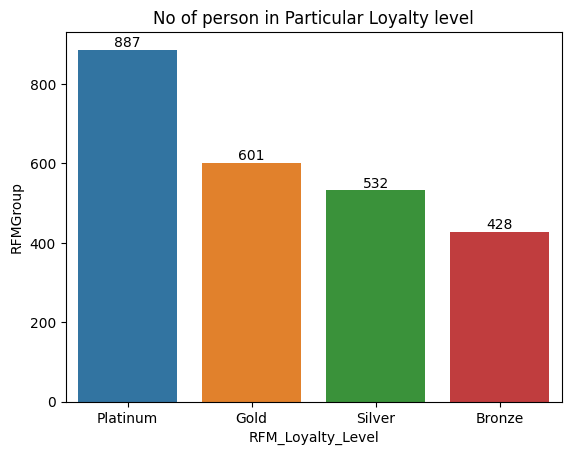

In [114]:
ax = sns.barplot(df_loyalty,x='RFM_Loyalty_Level',y='RFMGroup')
ax.bar_label(ax.containers[0])
ax.set_title("No of person in Particular Loyalty level")

In [117]:
df_all = df_t_cd.merge(RFMScores,on='customer_id')

In [116]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
customer_id,,,,,,,,,
1,8,11,3018.09,1,1,2,112,4,Platinum
2,129,3,2226.26,4,4,3,443,11,Bronze
3,103,7,3290.21,4,2,2,422,8,Gold
9,79,6,2353.11,3,2,3,323,8,Gold
10,44,5,3358.28,2,3,2,232,7,Gold


In [119]:
df_all.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,76,3,645.99,3,4,4,344,11,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,10.0,76,3,645.99,3,4,4,344,11,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,10.0,76,3,645.99,3,4,4,344,11,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,21,7,4179.11,2,2,1,221,5,Platinum
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,10.0,21,7,4179.11,2,2,1,221,5,Platinum


In [121]:
df_all.to_excel("All_kpmg.xlsx")

In [124]:
df_n.to_excel("New Customers.xlsx")